In [1]:
import torch
import torchvision.transforms as transforms
torch.cuda.is_available()

True

In [2]:
import easyocr
reader = easyocr.Reader(['en'])

In [3]:
image_path = './examples/meme.jpg'

# Read text from the image
result = reader.readtext(image_path)

In [4]:
result

[([[57, 1], [343, 1], [343, 45], [57, 45]],
  'COMPUTER VISION',
  0.9757856101678537),
 ([[50, 340], [348, 340], [348, 390], [50, 390]],
  'IS EVERYWHERE',
  0.9958637132940689),
 ([[241, 378], [400, 378], [400, 400], [241, 400]],
  'memegenerator net',
  0.713854962620642)]

In [5]:
# import cv2
# image_path = './examples/meme.jpg'
# image = cv2.imread(image_path)
# cv2.imshow('image', image)
# cv2.waitKey(0)

In [6]:
1+1

2

In [7]:
import matplotlib.pyplot as plt

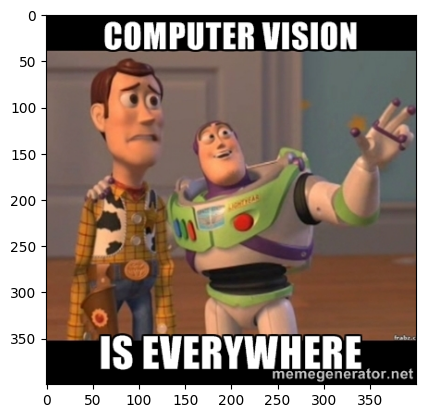

In [8]:
import cv2
image_path = './examples/meme.jpg'
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [9]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2

# Define the augmentation pipeline
transform = A.Compose(
    [
        A.RandomRotate90(p=0.5),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.2),
        A.MotionBlur(blur_limit=3, p=0.2),
        A.RandomScale(scale_limit=0.1, p=0.5),
    ],
    bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids'])
)

# Example document and bounding box
image = cv2.imread(image_path)  # Load an image
bboxes = [[100, 200, 300, 400]]  # Example bounding box in Pascal VOC format (x_min, y_min, x_max, y_max)
category_ids = [0]  # Class labels (e.g., 0 for consent message)

# Apply augmentation
augmented = transform(image=image, bboxes=bboxes, category_ids=category_ids)

# Augmented image and bounding boxes
augmented_image = augmented['image']
augmented_bboxes = augmented['bboxes']

# Save or visualize augmented data
cv2.imwrite('augmented_image.jpg', augmented_image)


True

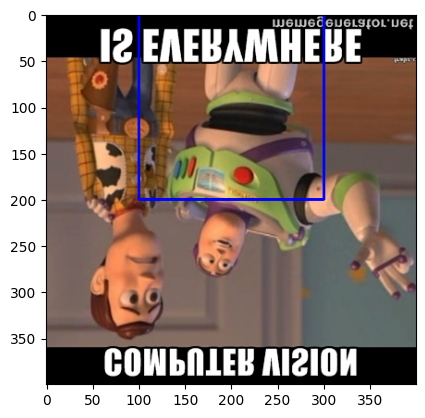

In [10]:
import matplotlib.pyplot as plt

# Function to draw bounding boxes
def draw_bboxes(image, bboxes):
    for bbox in bboxes:
        x_min, y_min, x_max, y_max = map(int, bbox)
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
    return image

# Visualize
augmented_image_with_bboxes = draw_bboxes(augmented_image.copy(), augmented_bboxes)
plt.imshow(cv2.cvtColor(augmented_image_with_bboxes, cv2.COLOR_BGR2RGB))
plt.show()


In [11]:
augmented_bboxes

[[100.0, 0.0, 300.0, 200.0]]

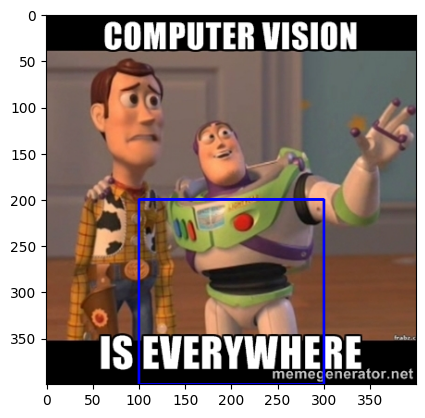

In [12]:
bboxes = [[100, 200, 300, 400]]
test_image = draw_bboxes(image.copy(), bboxes)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt", verbose=False)

# results = model("https://ultralytics.com/images/bus.jpg")
results = model.predict(source="https://ultralytics.com/images/bus.jpg", verbose=False)
# results = model.predict(source=image_path)

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg


In [14]:
im2 = cv2.imread(image_path)
# results = model.predict(source=im2, save=True, save_txt=True)
results = model.predict(source=im2)

In [15]:
type(results)

list

In [16]:
type(results[0])

ultralytics.engine.results.Results

In [17]:
results[0].summary()

[{'name': 'person',
  'class': 0,
  'confidence': 0.70502,
  'box': {'x1': 13.82042, 'y1': 47.26005, 'x2': 398.70947, 'y2': 348.45581}},
 {'name': 'person',
  'class': 0,
  'confidence': 0.60482,
  'box': {'x1': 129.26407, 'y1': 112.77382, 'x2': 377.76617, 'y2': 345.50616}}]

In [18]:
results[0].boxes.xyxy

tensor([[ 13.8204,  47.2600, 398.7095, 348.4558],
        [129.2641, 112.7738, 377.7662, 345.5062]], device='cuda:0')

In [19]:
def get_bboxes(results):
    bboxes = []
    for result in results[0].summary():
        bbox = list(result['box'].values())
        bboxes.append(bbox)
    return bboxes

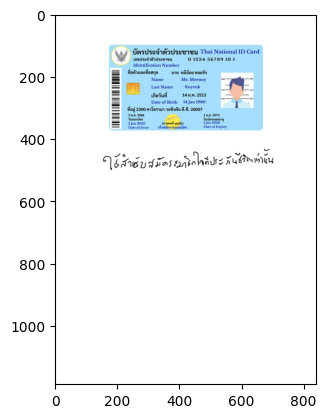

In [20]:
image = cv2.imread('./examples/TestConsentMessage.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

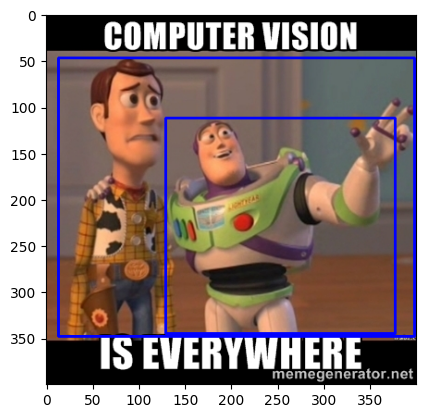

In [48]:
bboxes = get_bboxes(results)
test_image = draw_bboxes(image.copy(), bboxes)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.show()

In [17]:
import cv2
from ultralytics import YOLO

model = YOLO("yolo11n.pt")

cap = cv2.VideoCapture(1)

def get_bboxes(results):
    bboxes = []
    for result in results[0].summary():
        bbox = list(result['box'].values())
        bboxes.append(bbox)
    return bboxes

def draw_bboxes(image, bboxes):
    for bbox in bboxes:
        x_min, y_min, x_max, y_max = map(int, bbox)
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
    return image

while True:
    ret, frame = cap.read()
    results = model.predict(source=frame, verbose=False)
    bboxes = get_bboxes(results)
    frame = draw_bboxes(frame.copy(), bboxes)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [9]:
cap.release()